# Bibliotecas que serão utilizadas
**pandas** - gerenciamento o conjunto de dados

**DescisionTreeClassifier** - classificador do tipo árvore de decisão

**train_test_split** - divisão do conjunto de dados em treinamento e teste

**metrics** - métricas para avaliação do desempenho

In [18]:
### !pip install --upgrade scikit-learn==0.20.3
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Carregando o conjunto de dados
Este conjunto de dados simples é formado por apenas 10 registros de usuários (cinco humanos e cinco bots).

In [19]:
dados = pd.read_csv("https://www.each.usp.br/digiampietri/ACH2197/dados/HumanosEBots.csv", sep='\t', encoding = 'UTF-8')
dados.head()

id  followers_count  friends_count  listed_count  favourites_count  \
0  User01               14              1             4                 1   
1  User02               16              0             0                 0   
2  User03               16              2             4                 0   
3  User04               44            218             5              5475   
4  User05               55            103             0               157   

   class  
0    bot  
1    bot  
2    bot  
3  human  
4  human

In [20]:
dados.groupby('class').count()

id  followers_count  friends_count  listed_count  favourites_count
class                                                                    
bot     5                5              5             5                 5
human   5                5              5             5                 5

In [21]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                10 non-null     object
 1   followers_count   10 non-null     int64 
 2   friends_count     10 non-null     int64 
 3   listed_count      10 non-null     int64 
 4   favourites_count  10 non-null     int64 
 5   class             10 non-null     object
dtypes: int64(4), object(2)
memory usage: 608.0+ bytes


## Seleção das características
Separação dos dados em dados de acordo com as características (classe/alvo ou características a serem usadas pelo modelo).

In [22]:
caracteristicas_utilizadas = ['followers_count', 'friends_count', 'listed_count', 'favourites_count']
X = dados[caracteristicas_utilizadas] 
y = dados['class'] 

## Separação dos conjuntos
Separação dos conjuntos de treinamento e teste (70% para treinamento e 30% para teste).

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [24]:
print('Tamanho do conjunto de treinamento: %i'%y_train.shape[0])
print('Tamanho do conjunto de teste: %i'%y_test.shape[0])

Tamanho do conjunto de treinamento: 7
Tamanho do conjunto de teste: 3


## Treinando (ou construindo) o modelo
A árvore de decisão terá altura máxima 3 e usará o critério de otimização da entropia.

In [25]:
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)

classifier = classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

## Realizando a predição


In [26]:
print(y_pred)

['bot' 'bot' 'human']


## Avaliando o modelo
Computar e exibir métricas de desempenho.

In [27]:
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))

report=metrics.classification_report(y_test,y_pred)

print('Relatório para Árvore de Decisão - Detecção de Bots')

print(report)

Acurácia: 1.0
Relatório para Árvore de Decisão - Detecção de Bots
              precision    recall  f1-score   support

         bot       1.00      1.00      1.00         2
       human       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



## Visualizando a árvore de decisão

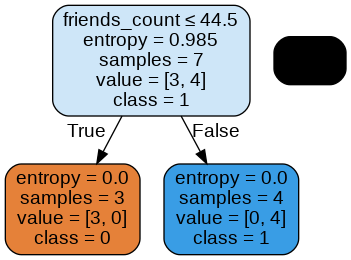

In [28]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = caracteristicas_utilizadas,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bots.png')
Image(graph.create_png())

## Produzindo matriz de confusão
Matriz de confusão aplicando o modelo criado a todo o conjunto de dados.
Há viés neste resultado, pois parte dos dados foi usado para o treinamento (é algo apenas ilustrativo).

In [29]:
dataset = pd.read_csv("https://www.each.usp.br/digiampietri/ACH2197/dados/HumanosEBots.csv", sep='\t', encoding = 'UTF-8')

In [30]:
y_dataset_true = dataset['class']
y_dataset_pred = classifier.predict(X)

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_dataset_true, y_dataset_pred)

array([[5, 0],
       [0, 5]])